# STOR 120: Take Home Midterm #2

60 points total

**Due:** Friday, March 31st Gradescope before class at 11:15am
  
**Directions:** The exam is open book, notes, course materials, and internet. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question. **Make sure to view your submission in Gradescope and verify that it is the correct file and has the format that you intended it to have, including all code being shown and run. You may add extra code cells and additional lines of code to given cells as needed.**

**Reminder:** If you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, or by using the solutions to exams from previous semesters. This is a zero tolerance policy and all suspected honor code violations will be reported. 

Dr. Remi will hold longer office hours on Thursday, 3/30/2023 to provide guiding questions regarding the exam. Due to the large class size, it is NOT possible to answer all individual questions sent via email. Please refrain from this. Questions will only be answered in person. To accommodate different available times of students, I will spread the office hours throughout Thursday(3/30/2023) as follows

- 10 am - 11 am
- 1 pm - 2 pm
- 4 pm - 5 pm


Run the cell below to set up the notebook.

In [592]:
from datascience import *
import numpy as npz
import random

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Pass the Pig

In homework 6 you investigated outcomes with the game [Pass the Pigs](https://en.wikipedia.org/wiki/Pass_the_Pigs), a dice game using asymmetrical throwing dice (shaped like pigs). 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/Pass_the_pigs_dice.jpg"  width='500' alt="Pass the Pigs Image">

On this exam you will simulate the outcomes of a modified version of Pass the Pigs with the following rules. Each turn involves one player throwing one model pig, which has a dot on one side. The player gains or loses points based on the way the pig lands. Each turn lasts until the player throwing either rolls the pig in a way that wipes out their current turn score, or decides to stop their turn, add their turn score to their total score, and pass the pigs to the next player. The winner is the player with the highest total score after each player has taken 50 turns.

When throwing one pig there are six outcomes with the following (approximate) probabilities:

Position       | Probability | Description
---------------|-------------|-------------------------------------------------
Side (no dot)  | 0.3490      | The pig is lying on its side without a dot
Side (dot)     | 0.3020      | The pig is lying on its side with a dot
Razorback      | 0.2240      | The pig is lying on its back
Trotter        | 0.0880      | The pig is standing upright
Snouter        | 0.0300      | The pig is leaning on its snout
Leaning Jowler | 0.0061      | Jowler - The pig is resting on its snout and ear

If the player throws a `Side (no dot)` or `Side (dot)` they receive zero points and their turn in over. If the player throws a `Razorback` or `Trotter` they receive 5 points, 10 points for a `Snouter`, and 15 points for a `Leaning Jowler`. When the player throws a pig for more than 0 points, they have the choice to throw again or end their turn and add their current points to their total points. On the second throw, if the player throws a `Side (no dot)` or `Side (dot)` they receive zero points for their turn and their turn in over. If the player rolls a `Razorback`, `Trotter`, `Snouter` or `Leaning Jowler`, they add these points to the points in the first throw. The player then has the choice to continue throwing (as many times as possible) and risk losing their points, or end their turn and add their current points to their total points. 

### 1.1. Competing Strategies *(20pts)*

**Question 1.1.1.** Freddy has decided to play the game conservatively and never risk losing points during his turn. His strategy is to always take the points that he has received during his first throw of the pig and never risk losing those points with a second throw. In the cell below write a function called `Freddy_Turn` that simulates Freddy taking one turn in this game. The function should take no arguments, simulate Freddy throwing a pig with the probabilities given in the table above, and return the number of points that Freddy received during his turn (as a `float` or `int`). *(4pts)*

In [593]:
positions = ["Side (no dot)", "Side (dot)", "Razorback", "Trotter", "Snouter", "Leaning Jowler"]
def Freddy_Turn():
    points: int = 0
    turn = random.choices(positions, k=1, weights=[34.9, 30.2, 22.4, 8.8, 3, .61])
    turn = turn[0]
    if turn == ["Side (no dot)" or "Side (dot)"]:
        points += 0
    if turn == "Razorback":
        points += 5
    if turn == "Trotter":
        points += 5
    if turn == "Snouter":
        points += 10
    if turn == "Leaning Jowler":
        points += 15
    return points

**Question 1.1.2.** Ash plans a less conservative strategy. If he thows a `Snouter` or `Leaning Jowler`, he will take the points that he has received during his first throw of the pig and not risk losing those points with a second throw. But if he throws a `Razorback` or `Trotter` he will always throw the pig a second time to try and receive more points. No matter what he throws this second time, he will end his turn and take the points. In the cell below write a function called `Ash_Turn` that simulates Ash taking one turn in this game. The function should take no arguments, simulate Ash throwing a pig with the probabilities given in the table above, and return the number of points that Ash received during his turn (as a `float` or `int`). *(7pts)*

In [594]:
def Ash_Turn():
    points: int = 0
    turn = random.choices(positions, k=1, weights=[34.9, 30.2, 22.4, 8.8, 3, .61])
    turn = turn[0]
    if turn == ["Side (no dot)" or "Side (dot)"]:
        points += 0
    if turn == "Razorback":
        points += 5
        second_turn = Freddy_Turn()
        if second_turn == 0:
            points = 0
    if turn == "Trotter":
        points += 5
        second_turn = Freddy_Turn()
        if second_turn == 0:
            points = 0
    if turn == "Snouter":
        points += 10
    if turn == "Leaning Jowler":
        points += 15
    return points

**Question 1.1.3.** Write a function `One_Game` that has no arguments and simulates Freddy and Ash playing one game of this modified version of Pass the Pigs, each taking 50 turns. This function should use the functions that you have created in the previous two questions. The function should return the difference in Freddy's and Ash's scores at the end of the game (Freddy's final score minus Ash's final score, as a `float` or `int`). *(3pts)*

In [595]:
def One_Game():
    freddy_score = 0
    ash_score = 0
    for i in np.arange(50):
        freddy_score = freddy_score + Freddy_Turn()
    for i in np.arange(50):
        ash_score = ash_score + Ash_Turn()
    return freddy_score - ash_score

**Question 1.1.4.** Simulate playing this game with Freddy's and Ash's different startegies 2500 times, keeping track of the difference in Freddy's and Ash's scores at the end of each game (Freddy's final score minus Ash's final score). Construct a histogram showing the distribution of these differences in scores. *(4pts)*

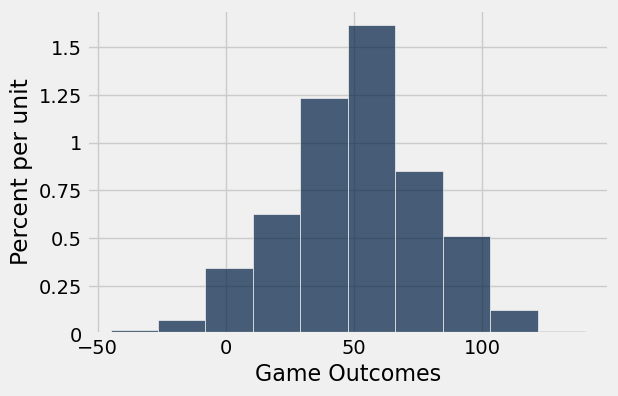

In [596]:
games = make_array()
for i in np.arange(2500):
    games = np.append(games, One_Game())

all_scores = Table().with_column('Game Outcomes', games)
all_scores.hist()

**Question 1.1.5.** What proportion of your games simulated in the previous question did Ash win? *(2pts)*

In [597]:
(all_scores.where('Game Outcomes', are.below(0)).num_rows / all_scores.num_rows)

0.0272

### 1.2. Questionable Side Probabilities *(14pts)*

Ash does not believe that the probabilites listed in the above table are correct. He believes that the probability for scoring zero points in one throw of the pig is different than listed in the table (which may have lead to his strategy seemingly not working as well as he had thought that it would during the simulation in a previous question). To test his claim, he threw the pig 400 times with it landing on one of the sides 247 times. 

**Question 1.2.1.**  Perform a hypothesis test at the 5% significance level (p-value cutoff) to test Ash's claim with his sample data. For this test, you should use the following hypotheses:

*Null Hypothesis:* The probability of throwing one pig and having it land on either side is equal to the information given in the table.      
    
*Alternative Hypothesis*: The probability of throwing one pig and having it land on either side is **different** from the information given in the table.

To receive full credit you should:

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Assume that the null hypothesis is true, sample from the theoretical population under the null hypothesis, obtain the simulated test statistic, and repeat this 5000 times.

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! *(10pts)*

In [598]:
Pig_sides = np.array(np.repeat(1, 247))
Pig_sides = np.append(Pig_sides, np.repeat(0, 153))
Pig_sides_as_table = Table().with_column("Side", Pig_sides)

sides_proportion_in_test = (Pig_sides_as_table.where('Side', 1).num_rows) / Pig_sides_as_table.num_rows
observed_test_statistic = abs(sides_proportion_in_test - (0.349 + 0.302))

all_sample_proportions = make_array()
for i in np.arange(5000):
    sampled_table = Pig_sides_as_table.sample()
    sample__number_of_sides = (sampled_table.where('Side', 1).num_rows) / 400
    sampled_proportion = abs(sample__number_of_sides - (0.349 + 0.302)) 
    all_sample_proportions = np.append(all_sample_proportions, sampled_proportion)

all_sample_proportions

array([ 0.061 ,  0.019 ,  0.006 , ...,  0.046 ,  0.0635,  0.031 ])

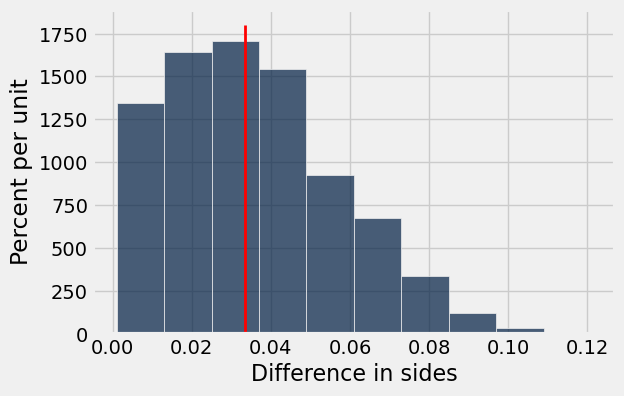

In [599]:
Samples_ploted = Table().with_column('Difference in sides', all_sample_proportions)
Samples_ploted.hist()
plots.plot([observed_test_statistic, observed_test_statistic], [0,18], color='red', lw=2)

In [600]:
p_value = sum(all_sample_proportions >= observed_test_statistic)/5000
p_value

0.51900000000000002

In this problem, we fail to reject the null hypothesis. With our P-value being greater than the 5% cut-off, the probability of throwing one pig and it landing on a side is equal to the information provided in the table. Although our data supports the idea of the alternative hypothesis that the probability of throwing one pig and it land on either side is different from the information given in the table.

**Question 1.2.2.** What possible values of the observed sample proportion (number of Ash's throws landing on the pig's side out of 400 attempts) would have led you to reject the null hypothesis? Using the simulated values from the previous question, list all possible ranges of values for this observed sample proportion (that would have led you to reject the null hypothesis). *(4pts)*

In [601]:
left = percentile(2.5, all_sample_proportions)
right = percentile(97.5, all_sample_proportions)

left, right

(0.0014999999999999458, 0.081000000000000072)

If the value of the observed sample proportion was less than my left bound (.00149) or greater than my right bound (97.5)

## 2. Let's Play a Different Game *(26pts)*

Freddy and Ash decide to play a different game. To help them decide, they use the `BoardGame` dataset. This dataset contains data collected on board games from the BoardGameGeek (BGG) website in February 2021. BGG is the largest online collection of board game data which consists of data on more than 100,000 total games (ranked and unranked). The voluntary online community contributes to the site with reviews, ratings, images, videos, session reports and live discussion forums on the expanding database of board games. This data set contains all ranked games (~20,000) as of the date of collection from the BGG database. Unranked games are ignored as they have not been rated by enough BGG users (a game should receive at least 30 votes to be eligible for ranking).

Run the cell below to load the `BoardGame` table.

In [602]:
BoardGame = Table.read_table('https://raw.githubusercontent.com/JA-McLean/STOR120/master/data/BoardGames.csv')
BoardGame

Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average
Gloomhaven,2017,1,4,120,14,42055,8
Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8
Brass: Birmingham,2018,2,4,120,14,19217,8
Terraforming Mars,2016,1,5,120,12,64864,8
Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8
Gloomhaven: Jaws of the Lion,2020,1,4,120,14,8392,8
Through the Ages: A New Story of Civilization,2015,2,4,120,14,23061,8
Gaia Project,2017,1,4,150,12,16352,8
Star Wars: Rebellion,2016,2,4,240,14,23081,8
Twilight Struggle,2005,2,2,180,13,40814,8


**Question 2.1.** Freddy and Ash want to narrow their search for a game based on specific criteria. Construct a new table `BoardGameToPlay` that includes all of the columns of the `BoardGame` table but containing only the board games with exactly 2 `Min Players` and 2 `Max Players`, a `Play Time` of at least 3 minutes, but less than 30 minutes, and games that were published in the year 2000 or later. You should also add one additional column `Recent` that should be equal to the `1` if the board game was published in 2010 or later and equal to `0` if the board game was published prior to 2010. *(4pts)*

In [603]:
BoardGameUpdated = BoardGame.where('Min Players', are.equal_to(2)).where('Max Players', are.equal_to(2)).where('Play Time', are.between(3,30)).where('Year Published', are.above_or_equal_to(2000))

BoardGameToPlay = BoardGameUpdated.with_column('Recent', (BoardGameUpdated.column('Year Published') >= 2010) * 1)
BoardGameToPlay

Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,Recent
Star Realms,2014,2,2,20,12,35947,7,1
Star Realms: Colony Wars,2015,2,2,20,12,6075,7,1
Hanamikoji,2013,2,2,15,10,11047,7,1
Hive,2000,2,2,20,9,29596,7,0
Onitama,2014,2,2,20,8,15161,7,1
KLASK,2014,2,2,10,8,5667,7,1
Mandala,2019,2,2,20,10,2338,7,1
Fugitive,2017,2,2,20,10,3922,7,1
Mr. Jack Pocket,2010,2,2,15,14,7575,6,1
Blokus Duo,2005,2,2,15,5,5107,6,0


**Question 2.2.** Freddy is convinced that newer games, published in 2010 or later, are better for them to play and have a higher mean `Rating Average`. While this may be true for the games in the `BoardGameToPlay` table, would his hold true for all games with this same criteria? Perform a hypothesis test to test this claim with our `BoardGameToPlay` data. Use the following hypotheses:

**Null Hypothesis:** The mean `Rating Average` of board games published before 2010 is equal to the mean `Rating Average` of board games published in 2010 or later. 
    
**Alternative Hypothesis**: The mean `Rating Average` of board games published before 2010 is less than the mean `Rating Average` of board games published in 2010 or later.

To receive full credit you should:

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Shuffle the labels of the original sample, find your simulated test statistic, and repeat at least **500 times**

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! *(10pts)*

In [604]:
def difference_of_mean_ratings(table):
    after2010 = table.where('Recent', are.equal_to(1))
    before2010 = table.where('Recent', are.equal_to(0))
    after2010_mean = np.mean(after2010.column('Rating Average'))
    before2010_mean = np.mean(before2010.column('Rating Average'))
    return after2010_mean - before2010_mean

observed_statistic = difference_of_mean_ratings(BoardGameToPlay)

In [605]:
shuffled_samples = make_array()
for i in np.arange(500):
    shuffled_labels = BoardGameToPlay.sample(with_replacement = False).column('Recent')
    drop_original_add_shuffle = BoardGameToPlay.drop('Recent').with_column('Recent', shuffled_labels)
    one_shuffled_sample = difference_of_mean_ratings(drop_original_add_shuffle)
    shuffled_samples = np.append(shuffled_samples, one_shuffled_sample)

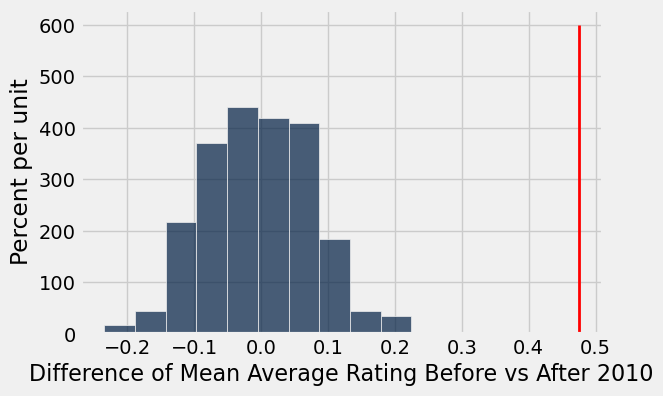

In [606]:
samples_hist = Table().with_column('Difference of Mean Average Rating Before vs After 2010', shuffled_samples)
samples_hist.hist()
plots.plot([observed_statistic, observed_statistic], [0, 6], color='red', lw=2)

In [607]:
p_value_of_ratings = sum(shuffled_samples >= observed_statistic)/500
p_value_of_ratings

0.0

Based on the histogram, because the p-value of 0.0 is less than the 5% cut-off, we can reject the null hypothesis.

**Question 2.3.** Freddy and Ash decide to play the game Quadefy, mainly since it was cited as having an average play time of 3 minutes. Over 1.5 hours later Ash and Freddy have played the game 32 times, with Ash winning 22 of the games. Ash claims that his strategy is better than Freddy's strategy. Construct a 90% confidence interval to predict the proportion of games of Quadefy that Ash would win if they kept playing with their same strategies forever.

**To receive full credit you should:**

1. Take bootstrap samples from the original sample, compute the proportion of Ash's wins, and repeat 5000 times

2. Determine the upper and lower bounds of the 90% confidence interval

3. Assign the bounds of the confidence interval to: lower_bound, upper_bound

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! You do **not** need to plot a histogram of the bootstrap statistics with the confidence interval. *(8pts)*

In [608]:
number_of_games = make_array(np.repeat(1,22))
number_of_games = np.append(number_of_games, np.repeat(0, 10))
original_result = Table().with_column('Result', number_of_games)

def bootstrap_original():
    sample_of_games = original_result.sample()
    return (sample_of_games.where('Result', are.equal_to(1)).num_rows) / original_result.num_rows

all_bootstrap_proportions = make_array()
for i in np.arange(5000):
    one_bootstrap_proportion = bootstrap_original()
    all_bootstrap_proportions = np.append(all_bootstrap_proportions, one_bootstrap_proportion)
    
lower_bound = percentile(5, all_bootstrap_proportions)
upper_bound = percentile(95, all_bootstrap_proportions)

# Do not change the code below
lower_bound, upper_bound

(0.5625, 0.8125)

**Question 2.4.** From your simulation conducted in the previous question (and no new simulation), suppose that you plan to conduct a hypothesis test at the 5% significance level with the following hypotheses: 

*Null Hypothesis:* The proportion of games of Quadefy that Ash would win if they kept playing with their same strategies forever is `Some_Proportion`.

*Alternative Hypothesis:* The proportion of games of Quadefy that Ash would win if they kept playing with their same strategies forever is greater than `Some_Proportion`.

For what values of `Some_Proportion` would you reject the null hypothesis and have evidence to support the alternative hypothesis at the 5% significance level? Assign an array of two values to `Some_Proportion_array`, containing the smallest and largest values of `Some_Proportion` that would lead you to reject this null hypothesis given your simulated data. *(4pts)*

In [609]:
Some_Proportion_array = make_array(percentile(2.5, all_bootstrap_proportions), percentile(97.5, all_bootstrap_proportions))
Some_Proportion_array

array([ 0.53125,  0.84375])